In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading of the data
food_Data = pd.read_csv("C:/Users/PROFFESSOR/Desktop/HAMOYE WORK/FoodBalanceSheets.csv", encoding= "unicode_escape" )

# ID: 146d535d8501f000

In [3]:
#lets check out the number of rows and columns
food_Data.shape

(60943, 12)

In [4]:
#snapshot of the data
food_Data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [5]:
#more general information about the data
food_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


From the dataset above, we can see that we have 8 numerical variables and 4 categorical variables.
We can also see that there are missing values in the year variables.

In [6]:
#What is the total number and percentage of missing data in 2016 to 2 decimal places?
#check number of missing values by columns
#there 1535 missing values in Y2016
food_Data.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [7]:
#percentage of missing data in 2016 to 2 decimal places?
# percentage is 2.52
food_Data.isnull().sum()/len(food_Data) * 100

Area Code       0.000000
Area            0.000000
Item Code       0.000000
Item            0.000000
Element Code    0.000000
Element         0.000000
Unit            0.000000
Y2014           2.607354
Y2015           2.540078
Y2016           2.518747
Y2017           2.471162
Y2018           2.356300
dtype: float64

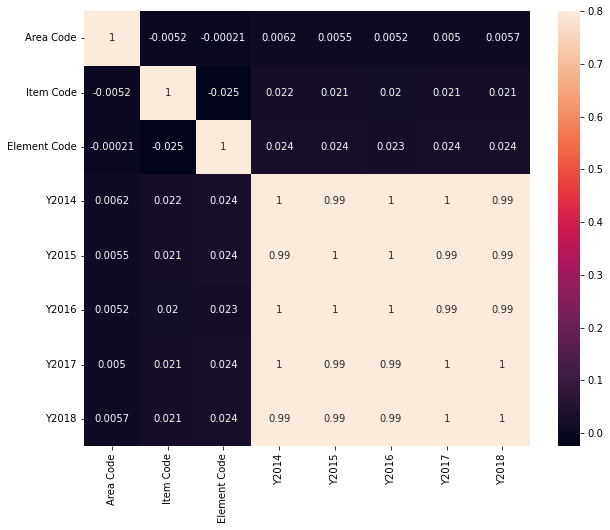

In [8]:
#Which year had the highest correlation with ‘Element Code’?
#according to the correlation heatmap, all the years apart from y2016 have a tie correlation with element of 0.024
# heat map of correlation of features
correlation_matrix = food_Data.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

In [9]:
#total sum of Animal Fat produced in 2014 is 209460.54
food_Data.groupby('Item')['Y2014'].sum()['Animal fats']

209460.54

In [10]:
#total sum of Animal Fat produced in 2017  is 269617.53
food_Data.groupby('Item')['Y2017'].sum()['Animal fats']

269617.53

In [11]:
#What is the mean and standard deviation across the whole dataset for the year 2015 to 3 decimal places
#mean = 135.196
#std = 1603.404
food_Data.aggregate(['mean','std']).round(3)

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
mean,134.266,2687.177,3814.856,134.196,135.236,136.555,140.918,143.758
std,72.606,146.056,2212.007,1567.664,1603.404,1640.007,1671.862,1710.783


In [12]:
#Year with highest sum of import quantity
#year happens to be Y2017
food_Data.groupby(['Element']).aggregate('sum')

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


In [13]:
#Total number of sum of production in 2014
#Total sum of production is 1931287.75
food_Data.groupby(['Element'])['Y2014'].aggregate('sum')['Production']

1931287.75

In [14]:
#Element with highest sum in 2018 is Domestic supply quantity
food_Data.groupby(['Element'])['Y2018','Element'].aggregate('sum').sort_values('Y2018',ascending=False).head(1)

,Y2018
Element,
Domestic supply quantity,2161192.1


In [15]:
#Element with 3rd lowest sum in 2018 is Protein supply quantity 
food_Data.groupby(['Element'])['Y2018','Element'].aggregate('sum').sort_values('Y2018',ascending=False).tail(3)

,Y2018
Element,
Protein supply quantity (g/capita/day),11833.56
Fat supply quantity (g/capita/day),10258.69
Tourist consumption,90.00


In [16]:
#Total import quantity in algeria in 2018
#Algeria is in the first five Areas.
food_Data.groupby(['Element','Area'])['Y2018'].aggregate('sum')['Import Quantity'].head()

Area
Algeria         36238.29
Angola           7769.67
Benin            7008.24
Botswana         1908.42
Burkina Faso     2605.64
Name: Y2018, dtype: float64

In [17]:
#Total number of unique countries in the dataset
#49
print(len(food_Data.Area.unique()))

49
